In [4]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Data Analysis for all Data Roles

## Exploring Roles

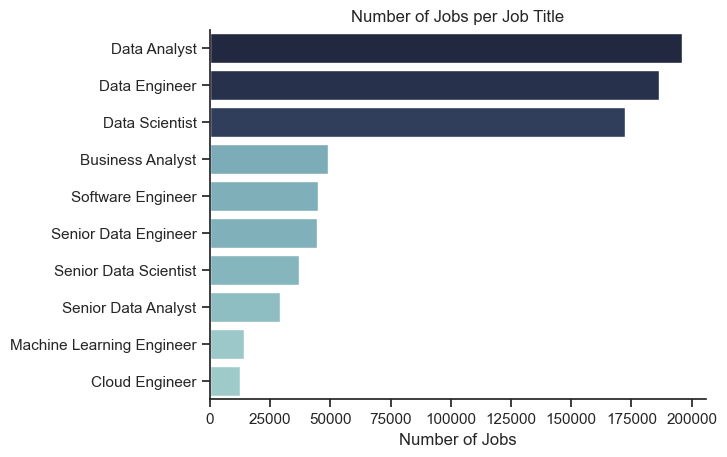

In [30]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='ch:rot=-.25,hue=1,light=.75', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## Exploring Countries

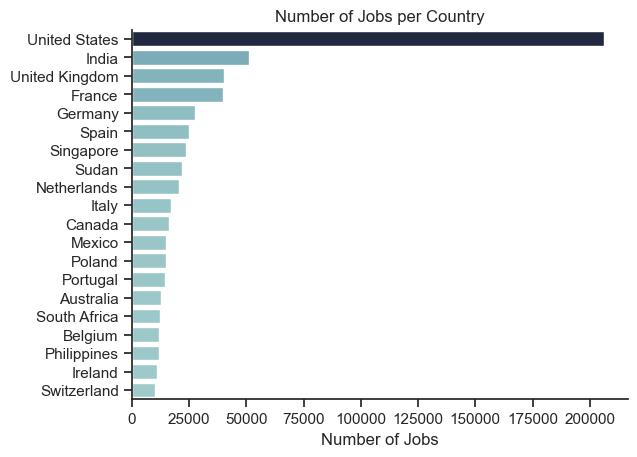

In [31]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='ch:rot=-.25,hue=1,light=.75', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## Exploring Companies

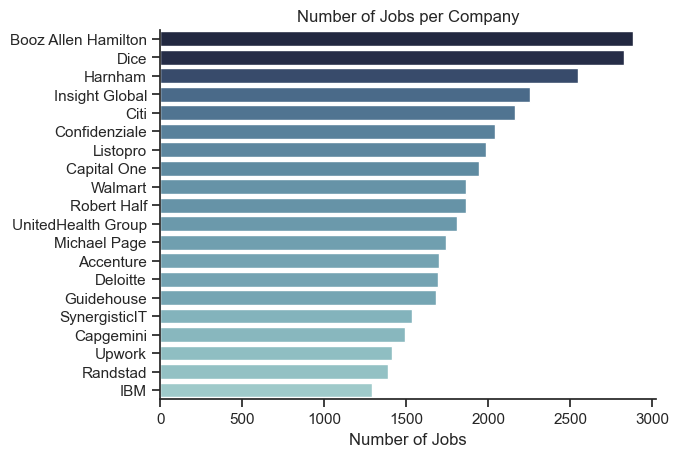

In [32]:
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='ch:rot=-.25,hue=1,light=.75', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## Job Opportunities

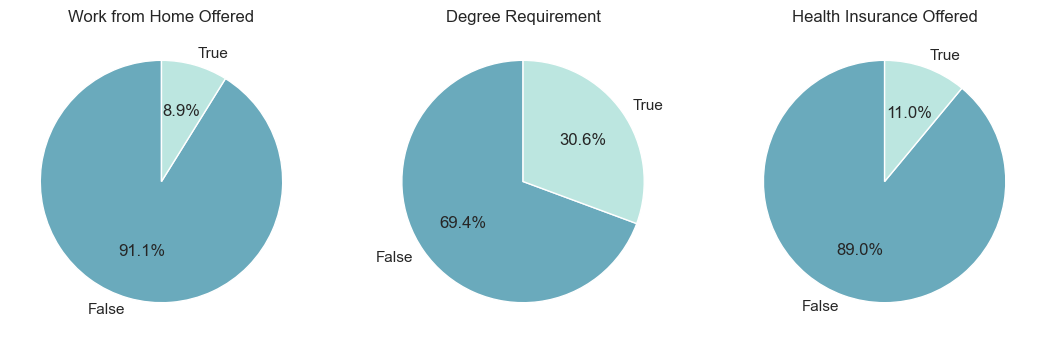

In [33]:
true_color = sns.color_palette("ch:rot=-.25,hue=1,light=0.85", n_colors=1)[0]
false_color = sns.color_palette("ch:rot=-.25,hue=1,light=0.6", n_colors=1)[0]
colors = [false_color, true_color]

dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    values = [
        df[column].value_counts().get(False, 0),
        df[column].value_counts().get(True, 0)
    ]
    ax[i].pie(values, labels=['False', 'True'], autopct='%1.1f%%', startangle=90, colors = colors)
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

#  Data Analysis for Data Analysts in the US

### Filter for US Data Analyst roles

In [ ]:
df_DA_US = df[
    (df['job_country'] == 'United States') &
    (df['job_title_short'] == 'Data Analyst')
].copy()

## Exploring Locations

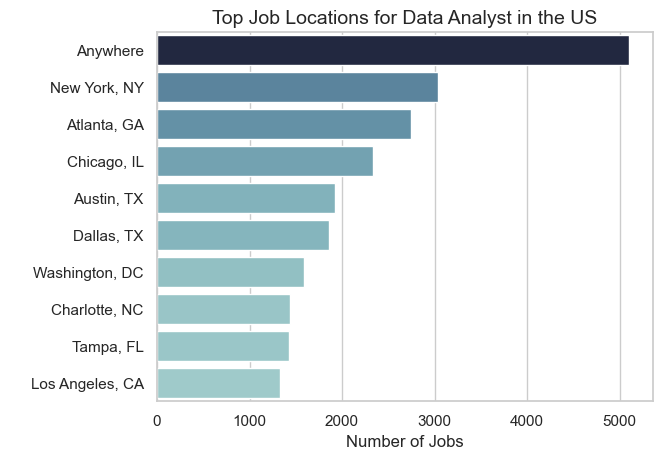

In [6]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style = 'whitegrid')
sns.barplot(data = df_plot, x = 'count', y = 'job_location', hue = 'count', palette = 'ch:rot=-.25,hue=1,light=.75')
plt.legend().remove()
plt.title('Top Job Locations for Data Analyst in the US', fontsize=14)
plt.xlabel('Number of Jobs')
plt.ylabel(' ')
plt.show()

## Job Opportunities

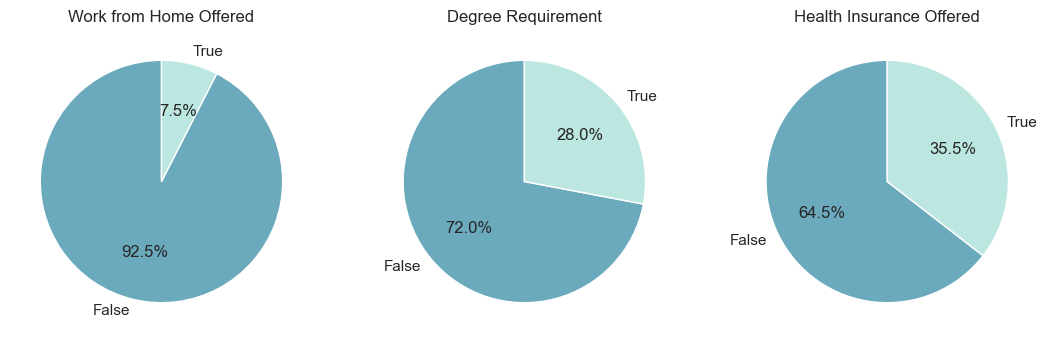

In [ ]:
true_color = sns.color_palette("ch:rot=-.25,hue=1,light=0.85", n_colors=1)[0]
false_color = sns.color_palette("ch:rot=-.25,hue=1,light=0.6", n_colors=1)[0]
colors = [false_color, true_color]

dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    values = [
        df_DA_US[column].value_counts().get(False, 0),
        df_DA_US[column].value_counts().get(True, 0)
    ]
    ax[i].pie(values, labels=['False', 'True'], autopct='%1.1f%%', startangle=90, colors = colors)
    ax[i].set_title(title)

plt.tight_layout()
plt.show()


## Exploring Companies

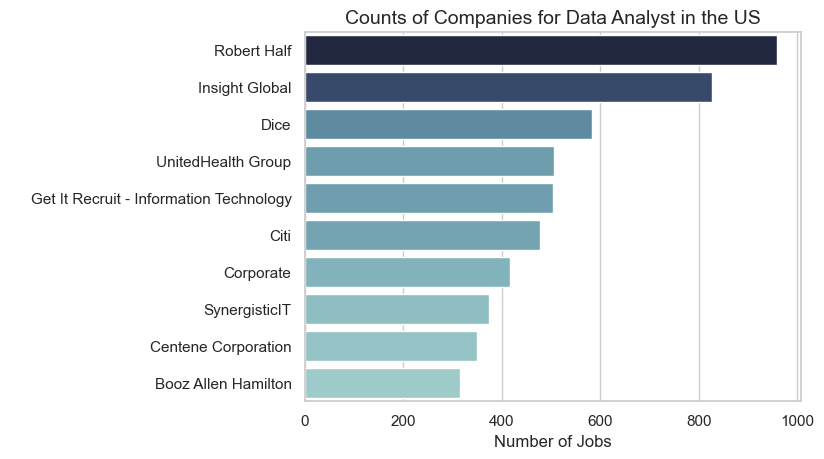

In [49]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style = 'whitegrid')
sns.barplot(data = df_plot, x = 'count', y = 'company_name', hue = 'count', palette = 'ch:rot=-.25,hue=1,light=.75')
plt.legend().remove()
plt.title('Counts of Companies for Data Analyst in the US', fontsize=14)
plt.xlabel('Number of Jobs')
plt.ylabel(' ')
plt.show()